# Linear Regression and Ridge Regression: scikit-learn

https://medium.com/ai-in-plain-english/linear-regression-and-ridge-regression-scikit-learn-7d1dff569271

We will show here a very basic example of linear regression in the context of curve fitting. In the last blog, we discussed linear and nonlinear regression model. We encountered overfitting while fitting the nonlinear model with degree 5. We will look at how ridge works when it comes to overfitting.

## How to do it
We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve-fitting regression problem.

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

We now define a deterministic nonlinear function underlying our generative model:

In [2]:
f = lambda x: np.exp(3 * x)

We generate the values along the curve on [0,2]:

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

Now, let’s generate data points within [0,1]. We use the function f and we add some Gaussian noise:

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

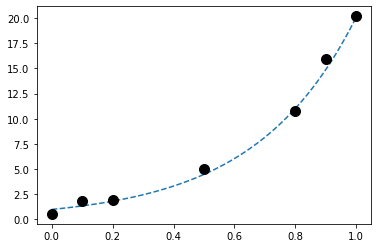

In [5]:
plt.plot(x_tr[:100], y_tr[:100], '--')
plt.plot(x, y, 'ok', ms=10)

Now, we use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the LinearRegression class). Then, we fit the model to our data. Finally, we predict the values from our trained model.

In [6]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

***We need to convert x and x_tr to column vectors, as it is a general
convention in scikit-learn that observations are rows, while features are
columns. Here, we have seven observations with one feature.***

We now plot the result of the trained linear model. We obtain a regression line in green here:

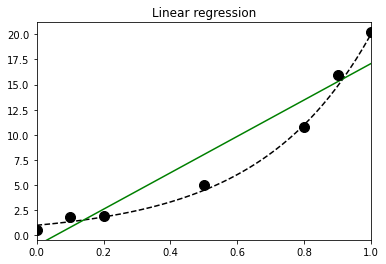

In [7]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0, 1)
plt.ylim(y.min()-1, y.max()+1)
plt.title("Linear regression")
lrp = lm.LinearRegression()

22.982 -4.845 0.000
-108.667 271.571 -204.780 58.656 2.852 0.000


Text(0.5, 1.0, 'Linear regression')

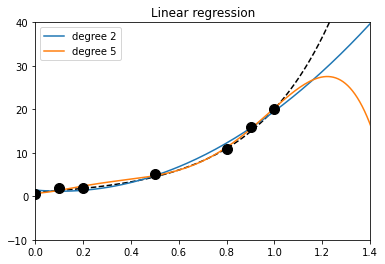

In [8]:
plt.plot(x_tr, y_tr, '--k')
for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp,label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    # Print the model's coefficients.
    print(' '.join(['%.3f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("Linear regression")

***Note the large coefficients of the degree 5 polynomial; this is generally a sign of overfitting***

We will now use a different learning model called ridge regression. It works like linear regression except that it prevents the polynomial’s coefficients from becoming too big. This is what happened in the previous example. By adding a regularization term in the loss function, ridge regression imposes some structure on the underlying model.

The ridge regression model has a meta-parameter, which represents the weight of the regularization term. We could try different values with trial and error using the Ridge class.

However, scikit-learn provides another model called **RidgeCV** , which
includes a parameter search with cross-validation. In practice, this means that
we don’t have to tweak this parameter by hand — scikit-learn does it for us.

As the models of scikit-learn always follow the fit-predict API, all we have to do is replace **lm.LinearRegression() with lm.RidgeCV()** in the previous code.

11.59 5.95 0.00
3.65 3.74 3.80 3.84 3.96 0.00


Text(0.5, 1.0, 'Ridge regression')

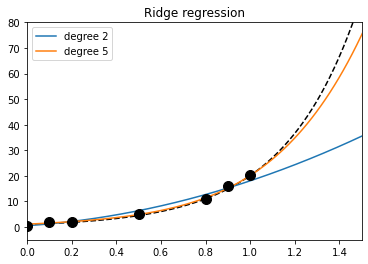

In [9]:
ridge = lm.RidgeCV()
plt.plot(x_tr, y_tr, '--k')
for deg in [2, 5]:
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_ridge,
    label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.5)
    plt.ylim(-5, 80)
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("Ridge regression")

This time, the degree 5 polynomial seems more precise than the **simpler degree 2 polynomial (which now causes underfitting). Ridge regression mitigates the overfitting issue here.** Observe how the degree 5 polynomial’s coefficients are much smaller than in the previous example.

## How it works

### Ordinary least squares regression
Ordinary least squares regression is one of the simplest regression methods. It consists of approaching the output values $y$ $i$ with a linear combination of $Xij$ :

$$\forall i \in\{1, \ldots, N\}, \hat{y}_{i}=\sum_{j=1}^{D} w_{j} X_{i j}, \text { or, in matrix form }: \hat{\mathrm{y}}=\mathrm{XW}$$

Here, $w = (w1 , …, wD )$ is the (unknown) parameter vector. Also, $ŷ$ represents the model’s output. We want this vector to match the data points y as closely as possible.
Of course, the exact equality $ŷ = y$ cannot hold in general (there is always some noise and uncertainty — models are always idealizations of reality). Therefore, we want to minimize the difference between these two vectors. The ordinary least squares regression method consists of minimizing the following loss function:

$$\min _{\mathrm{W}}\|\mathrm{y}-\mathrm{Xw}\|_{2}^{2}=\min _{\mathrm{W}}\left(\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}\right)$$

This sum of the components squared is called the $L²$ norm. It is convenient because it leads to differentiable loss functions so that gradients can be computed and common optimization procedures can be performed.

### Ridge regression
Polynomial interpolation with linear regression can lead to overfitting if the degree of the polynomials is too large. By capturing the random fluctuations (noise) instead of the general trend of the data, the model loses some of its predictive power. This corresponds to a divergence of the polynomial’s coefficients wj.

A solution to this problem is to prevent these coefficients from growing unboundedly. With ridge regression (also known as Tikhonov regularization), this is done by adding a regularization term to the loss function.

$$\min _{W}\|y-X w\|_{2}^{2}+\alpha\|w\|_{2}^{2}$$

By minimizing this loss function, we not only minimize the error between the model and the data (first term, related to the bias), but also the size of the model’s coefficients (second term, related to the variance). The bias-variance trade-off is quantified by the hyperparameter α , which specifies the relative weight between the two terms in the loss function.

Here, ridge regression led to a polynomial with smaller coefficients, and thus a better fit.

### Cross-validation and grid search
A drawback of the ridge regression model compared to the ordinary least squares model is the presence of an extra hyperparameter α. The quality of the prediction depends on the choice of this parameter. One possibility would be to fine-tune this parameter manually, but this procedure can be tedious and can also lead to overfitting problems.

To solve this problem, we can use a grid search; we loop over many possible values for α, and we evaluate the performance of the model for each possible value. Then, we choose the parameter that yields the best performance.

How can we assess the performance of a model with a given α value? A common solution is to use cross-validation. This procedure consists of splitting the dataset into a training set and a test set. We fit the model on the train set, and we test its predictive performance on the test set.

By testing the model on a different dataset than the one used for training, we reduce overfitting. There are many ways to split the initial dataset into two parts like this. One possibility is to remove one sample to form the train set and to put this one sample into the test set. This is called Leave-One-Out cross-validation. With N samples, we obtain N sets of train and test sets.

The cross-validated performance is the average performance on all these set decompositions.